**data** Crop mapping using fused optical-radar data set Data Set\
**Format**: text file\
**Size**: (325834, 175)\
**Types**: numbers and strings\
**Source**:  UCI Machine Learning Repository;\
Department of Remote Sensing & GIS, Faculty of Geography, University of Tehran, Tehran, I.R. Iran, 1417853933

**data** Winnipeg River Basin Long-term Water Quality Monitoring Data\
**Format**: csv file\
**Size**: (20349, 11)\
**Types**: dates, numbers and strings\
**Source**:  Environment and Climate Change Canada

## Crop mapping using fused optical-radar data set Data Set

In [1]:
# data set: Crop mapping using fused optical-radar data set Data Set
# data from
# https://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set

import pandas as pd

df_crop = pd.read_csv ('WinnipegDataset.txt')
df_crop.to_csv ('WinnipegDataset.csv', index=None)

In [2]:
# check data
df_crop.head(5)

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000



Seven crop type classes exist for this data set as follows: 1-Corn; 2-Peas; 3- Canola; 4-Soybeans; 5- Oats; 6- Wheat; and 7-Broadleaf.

## Attribute Information:
https://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set

175 attributes including:\
1- class;\
2- f1 to f49:Polarimetric features on 05 July 2012;\
3- f50 to f98:Polarimetric features on 14 July 2012;\
4- f99 to f136:Optical features on 05 July 2012;\
5- f137 to f174:Optical features on 14 July 2012

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from scipy.stats import spearmanr

In [4]:
# size
df_crop.shape

(325834, 175)

In [5]:
# check for non value
df_c = df_crop.dropna(how='all', axis=1)
df_c.shape

(325834, 175)

## Winnipeg River Basin Long-term Water Quality Monitoring Data

In [6]:
# data set: Winnipeg River Basin Long-term Water Quality Monitoring Data
# data from
# https://data.ec.gc.ca/data/substances/monitor/national-long-term-water-quality-monitoring-data/winnipeg-river-basin-long-term-water-quality-monitoring-data/?lang=en


In [7]:
df_water = pd.read_csv ('Water-Qual-Eau-Winnipeg-2000-present.csv')

In [8]:
# size
df_water.shape

(20349, 11)

In [9]:
# check for non value
df_w = df_water.dropna(how='all', axis=1)
df_w.shape

(20349, 9)

In [10]:
# check dtype
df_w.dtypes

SITE_NO             object
DATE_TIME_HEURE     object
FLAG_MARQUEUR       object
VALUE_VALEUR       float64
VMV_CODE             int64
UNIT_UNITE          object
VARIABLE            object
VARIABLE_FR         object
STATUS_STATUT       object
dtype: object

In [11]:
# change to datetime
pd.set_option('chained',None)
df_w['DATE_TIME_HEURE'] = pd.to_datetime(df_w['DATE_TIME_HEURE'])

df_w.dtypes

SITE_NO                    object
DATE_TIME_HEURE    datetime64[ns]
FLAG_MARQUEUR              object
VALUE_VALEUR              float64
VMV_CODE                    int64
UNIT_UNITE                 object
VARIABLE                   object
VARIABLE_FR                object
STATUS_STATUT              object
dtype: object

In [12]:
# check
df_w.head(5)

,SITE_NO,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,VMV_CODE,UNIT_UNITE,VARIABLE,VARIABLE_FR,STATUS_STATUT
0,MA05PF0022,2000-12-01 14:01:00,NaN,44.600,10111,MG/L,ALKALINITY TOTAL CACO3,ALCALINIT? TOTALE CACO3,P
1,MA05PF0022,2000-12-01 14:01:00,NaN,0.011,7540,MG/L,AMMONIA DISSOLVED,AZOTE AMMONIACAL DISSOUS,P
2,MA05PF0022,2000-12-01 14:01:00,NaN,0.000,7570,MG/L,AMMONIA UN-IONIZED (CALCD.),AZOTE AMMONIACAL NON IONIS? (CALC.),P
3,MA05PF0022,2000-12-01 14:01:00,NaN,54.367,6201,MG/L,BICARBONATE (CALCD.),BICARBONATE (CALC.),P
4,MA05PF0022,2000-12-01 14:01:00,NaN,13.500,100431,MG/L,CALCIUM DISSOLVED,CALCIUM DISSOUS,P


In [ ]:
# Time Series

In [157]:
# change index to datetime64
df_w = df_w.set_index('DATE_TIME_HEURE')

In [158]:
# timeFrame
timeFrame = pd.DataFrame(df_w, columns = ['SITE_NO','FLAG_MARQUEUR','VALUE_VALEUR','VMV_CODE',
                                         'UNIT_UNITE','VARIABLE','STATUS_STATUT'])

In [15]:
# filtering data from 2012-08-16
timeFrame.loc['2012-06-12':'2012-08-16',:]

,SITE_NO,FLAG_MARQUEUR,VALUE_VALEUR,VMV_CODE,UNIT_UNITE,VARIABLE,STATUS_STATUT
DATE_TIME_HEURE,,,,,,,
2012-08-16 11:10:00,MA05PF0022,<,1.070,103643,NG/L,"2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID",P
2012-08-16 11:10:00,MA05PF0022,<,1.540,103644,NG/L,"2,3,6-TBA",P
2012-08-16 11:10:00,MA05PF0022,<,1.720,103649,NG/L,"2,4,5-TRICHLOROPHENOXYACITIC ACID (2,4,5-T)",P
2012-08-16 11:10:00,MA05PF0022,<,1.350,103651,NG/L,"2,4-D BUTYRIC ACID (2,4-DB)",P
2012-08-16 11:10:00,MA05PF0022,NaN,1.730,103645,NG/L,"2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)",P
...,...,...,...,...,...,...,...
2012-08-16 11:10:00,MA05PF0022,NaN,0.111,107935,UG/L,URANIUM TOTAL,P
2012-08-16 11:10:00,MA05PF0022,NaN,0.535,107972,UG/L,VANADIUM DISSOLVED,P
2012-08-16 11:10:00,MA05PF0022,NaN,0.848,107936,UG/L,VANADIUM TOTAL,P


Dataframe shape:  (20349, 7)


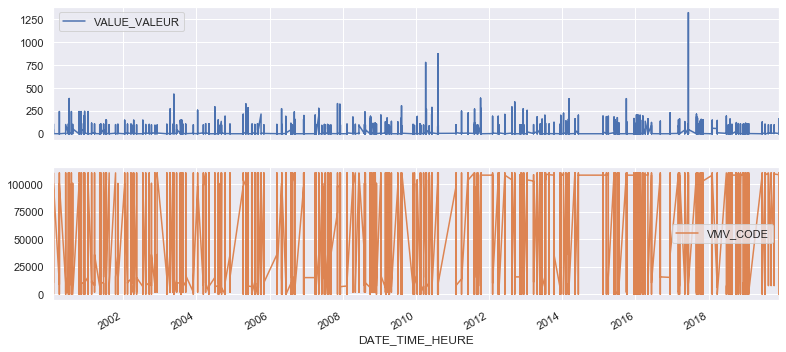

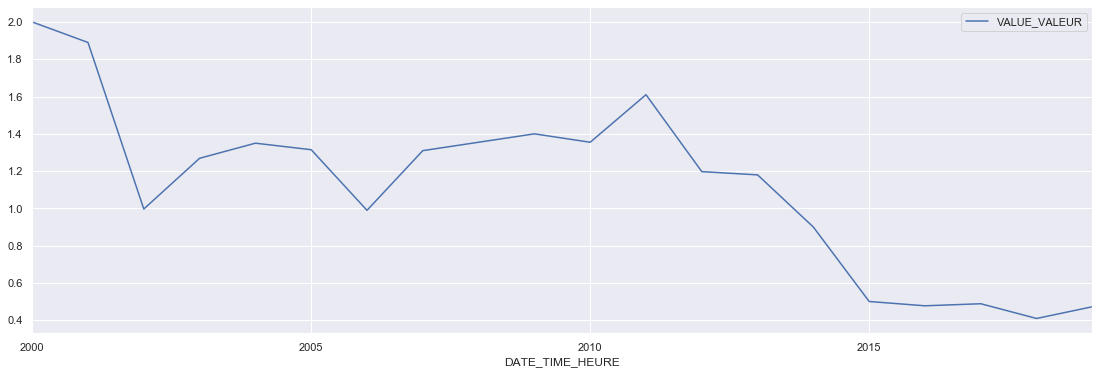

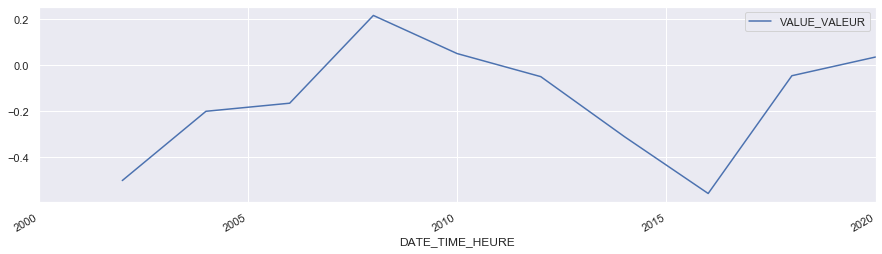

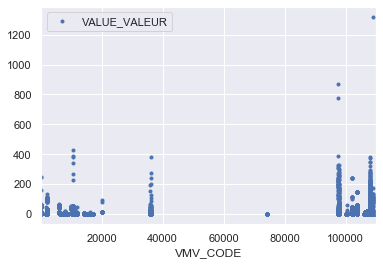

In [214]:
# ploting timeFrame with value
# see how the data distributed by time

print("Dataframe shape: ", timeFrame.shape)

dt = (timeFrame.index[-1] - timeFrame.index[0])

timeFrame.plot(subplots=True, figsize=(13,6))

timeFrame[["VALUE_VALEUR"]].resample("1y").median().plot(figsize=(19,6))

timeFrame[["VALUE_VALEUR"]].resample("2y").median().diff().plot(subplots=True, figsize=(15,4))

# see how the data distributed by code
timeFrame.plot(x="VMV_CODE", y=["VALUE_VALEUR"], style='.')

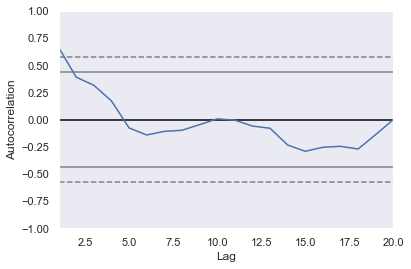

In [185]:
pd.plotting.autocorrelation_plot(timeFrame[["VALUE_VALEUR"]].resample("1y").median())

## Bar Plot

In [16]:
# to get the variables from the Winnipeg River Basin Long-term Water Quality Monitoring Data
# and count the number of fata points
va = df_w['VARIABLE'].squeeze()
vac = va.value_counts().rename_axis('Variable').reset_index(name='Variable_counts')
vac_v = vac.set_index('Variable')
vac_v

,Variable_counts
Variable,
TURBIDITY,467
SPECIFIC CONDUCTANCE,466
PH,457
CARBON DISSOLVED ORGANIC,243
NITROGEN TOTAL DISSOLVED,243
...,...
OXYCHLORDANE,2
GAMMA-CHLORDANE,2
CIS-NONACHLOR,2


In [17]:
# the 10 most frequently recored data
vac_vl = vac_v.iloc[0:10]

**The most commom variables in Winnipeg River Basin Long-term Water Quality Monitoring Data**

Text(0, 0.5, 'counts')

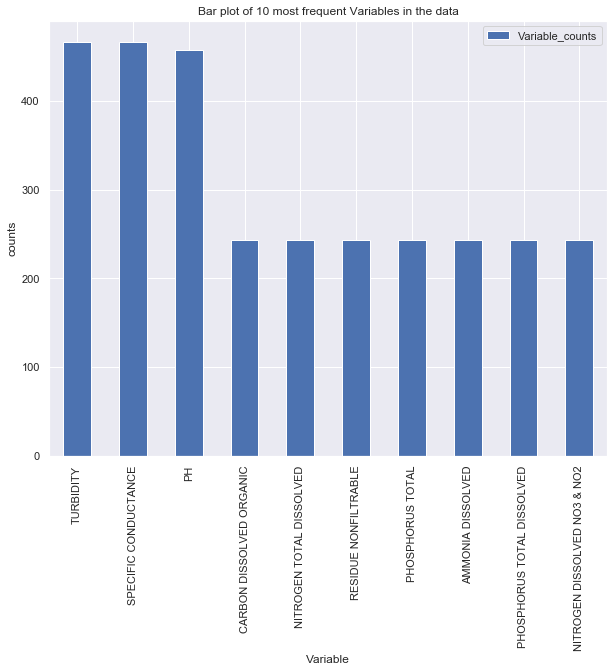

In [43]:
bar_vac = vac_vl.plot.bar(figsize=(10,8),
                          title = 'Bar plot of 10 most frequent Variables in the data')
bar_vac.set_ylabel('counts')


In [19]:
# to get numerical variable from the Crop mapping using fused optical-radar data set Data Set
type_classes = df_crop['label'].squeeze()
lablec = type_classes.value_counts().rename_axis('Classes').reset_index(name='DataPointCounts')
lablec_v = lablec.set_index('Classes')
lablec_v

,DataPointCounts
Classes,
6,85074
3,75673
4,74067
5,47117
1,39162
2,3598
7,1143


In [20]:
# Seven crop type classes exist for this data set as follows: 
# 1-Corn; 2-Peas; 3- Canola; 4-Soybeans; 5- Oats; 6- Wheat; and 7-Broadleaf.
c = ['Wheat','Canola','Soybeans','Oats','Corn','Peas','Broadleaf']
lablec_v['Class'] = c
lablec_v = lablec_v.set_index('Class')
lablec_v

,DataPointCounts
Class,
Wheat,85074
Canola,75673
Soybeans,74067
Oats,47117
Corn,39162
Peas,3598
Broadleaf,1143


In [213]:
# statistics
m_x = lablec_v.max()
me_an = lablec_v.mean()
m_n = lablec_v.min()
print('DataPointCounts =')
print('class with most data point has ',m_x,
      'class with median data point has ', me_an,
      'class with least data point has ', m_n)
    

DataPointCounts =
class with most data point has  DataPointCounts    85074
dtype: int64 class with median data point has  DataPointCounts    46547.714286
dtype: float64 class with least data point has  DataPointCounts    1143
dtype: int64


**The frequence of each Seven crop type classes in the data** 

Text(0, 0.5, 'Counts')

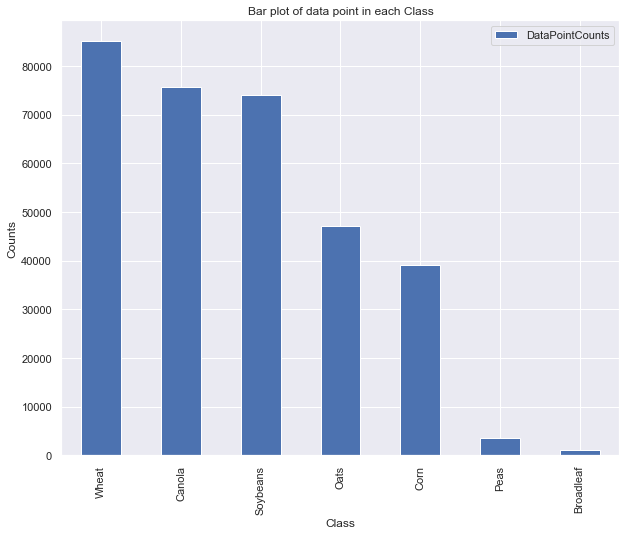

In [44]:
bar_crop = lablec_v.plot.bar(figsize=(10,8),
                             title = 'Bar plot of data point in each Class')
bar_crop.set_ylabel('Counts')

In [203]:
# check if all data points are included
lablec_v.apply(np.sum, axis=0)

DataPointCounts    325834
dtype: int64

## Scatterplot

In [159]:
# reset the index
df_w['index'] = range(1, len(df_w) + 1)
df_w = df_w.reset_index()

In [160]:
# get 'TURBIDITY' data point
Tur = df_w.loc[df_w['VARIABLE'] == 'TURBIDITY']

In [161]:
# change dtype
Tur1 =Tur['DATE_TIME_HEURE'].apply(lambda x:x.toordinal())

In [162]:
# add it to the dataFrame
Tur['time'] = Tur1

**Water Quality Turbidity Monitoring Data Turbidity by date**

In [46]:
# index = data point index

Text(0, 0.5, 'Turbidity')

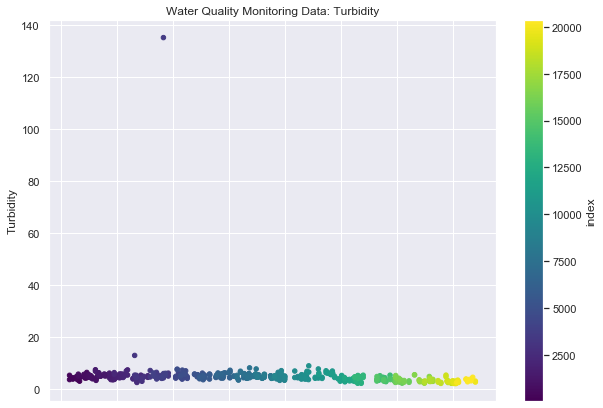

In [47]:
scatur = Tur.plot.scatter(x='time', y='VALUE_VALEUR', 
                          c='index', title = 'Water Quality Monitoring Data: Turbidity', 
                             figsize=(10,7),colormap='viridis')

scatur.set_xlabel('t')
scatur.set_ylabel('Turbidity')

In [ ]:
# outlier

**A scatterplot of Turbidity and Carbon dissolved organic**

In [116]:
d_organic = df_w.loc[df_w['VARIABLE'] == 'CARBON DISSOLVED ORGANIC']
d_organic = d_organic.reset_index()

In [117]:
Tur2 = Tur.drop(columns= ['time'])
Tur2 = Tur2.reset_index()

In [118]:
df_t_o = pd.concat([Tur2, d_organic])

In [119]:
value_t = df_t_o.iloc[0:467]

In [120]:
t = value_t[['VARIABLE','VALUE_VALEUR','index']]
t = t.rename(columns={"VALUE_VALEUR": "t_value","index": "t_index"})

In [121]:
value_o = df_t_o.iloc[468:710]

In [145]:
o = value_o[['VARIABLE','VALUE_VALEUR','index']]
o = o.rename(columns={"VALUE_VALEUR": "o_value","index": "o_index"})

In [123]:
df_to = pd.concat([t, o], axis=1)
df_to = df_to.reset_index()

Text(0, 0.5, 'Carbon dissolved organic')

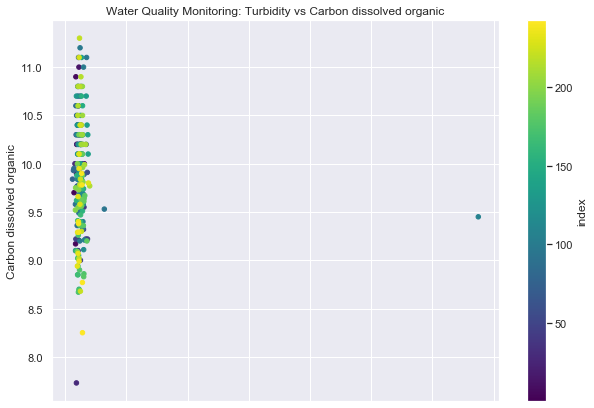

In [125]:
t_vs_o = df_to.plot.scatter(x='t_value', y='o_value', c='index',
                            title = 'Water Quality Monitoring: Turbidity vs Carbon dissolved organic', 
                            figsize=(10,7),colormap='viridis')

t_vs_o.set_xlabel('Turbidity')
t_vs_o.set_ylabel('Carbon dissolved organic')


**A scatterplot of pH and Carbon dissolved organic**

In [163]:
ph = df_w.loc[df_w['VARIABLE'] == 'PH']
ph = ph.reset_index()

In [139]:
df_p_o = pd.concat([ph, d_organic])

In [164]:
value_ph = df_p_o.iloc[0:457]
p = value_ph[['VARIABLE','VALUE_VALEUR','index']]
p = p.rename(columns={"VALUE_VALEUR": "p_value","index": "ph_index"})

In [166]:
df_po = pd.concat([p, o], axis=1)

Text(0, 0.5, 'Carbon dissolved organic')

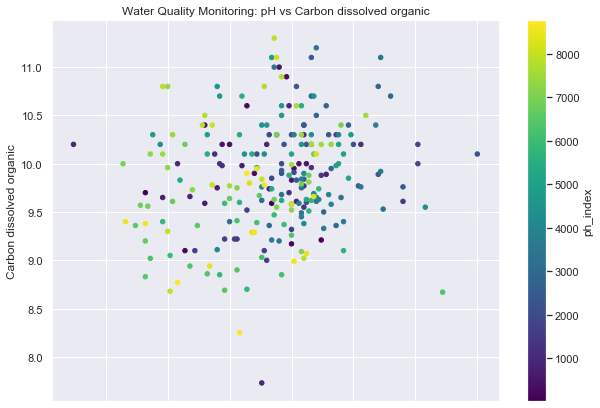

In [167]:
p_vs_o = df_po.plot.scatter(x='p_value', y='o_value', c='ph_index',
                            title = 'Water Quality Monitoring: pH vs Carbon dissolved organic', 
                            figsize=(10,7),colormap='viridis')

p_vs_o.set_xlabel('pH')
p_vs_o.set_ylabel('Carbon dissolved organic')

**No obvious correlation**

## Pie plot

**A Pie plot representing proportions of Seven crop type classes in the data**

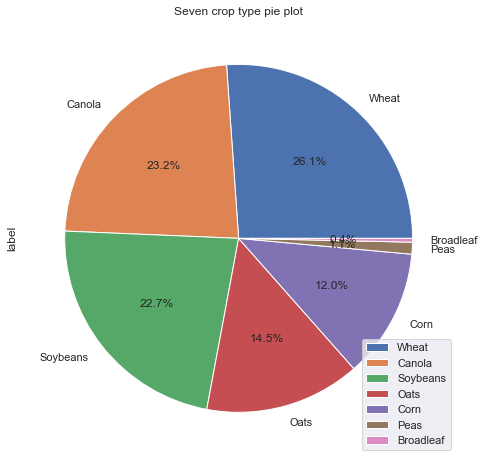

In [48]:
df_crop.label.value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,8),
                                      title = 'Seven crop type pie plot',
                                      labels=['Wheat','Canola','Soybeans','Oats',
                                              'Corn','Peas','Broadleaf'])




plt.legend(bbox_to_anchor=(1,0), loc="lower right")

## Histogram

In [30]:
# the first 6 Polarimetric features from 05 July 2012

Pol1 = df_crop.loc[:,'f1':'f6']
Pol1

,f1,f2,f3,f4,f5,f6
0,-13.55900,-21.4070,-11.40400,-15.24800,-11.92300,-15.29100
1,-12.80200,-20.3350,-10.39900,-14.13200,-11.09600,-14.36100
2,-12.43100,-19.9020,-10.07400,-13.59800,-10.82900,-14.04800
3,-12.68900,-19.5290,-10.02800,-13.35000,-11.05600,-14.01400
4,-12.68600,-19.2780,-9.81850,-13.10800,-10.93200,-13.93900
...,...,...,...,...,...,...
325829,2.48230,-7.6870,1.07950,0.74318,-0.94070,0.90493
325830,2.52340,-7.6745,1.08680,0.76189,-0.91177,0.93663
325831,-1.92700,-11.4160,-2.43540,-3.45370,-4.15130,-3.48100
325832,0.12483,-10.1440,-0.62193,-1.54210,-2.31000,-1.52500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256CEF63148>,
      dtype=object)

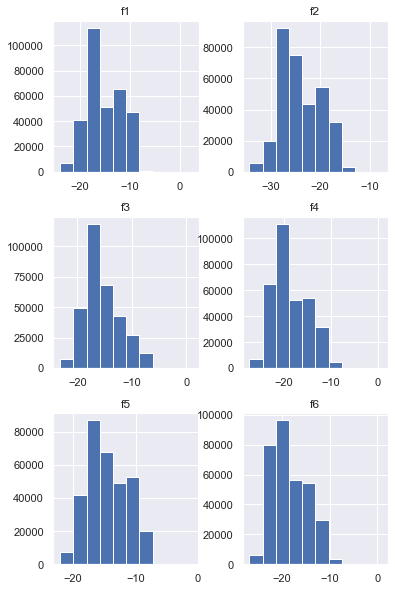

In [49]:
Pol1.hist(figsize=(6,10))

In [ ]:
# in f1, f3, f4, f6 Polarimetric features have values around (-20, -10)
# f2 is (-20, -30)

# f1, f3, f4 have values with frequency higher than 100000
# f2, f5 ,f6 have values with frequency higher than 80000

In [13]:
# statistics


# df_crop = pd.read_csv ('WinnipegDataset.txt')
# df_crop.to_csv ('WinnipegDataset.csv', index=None)
# Pol1 = df_crop.loc[:,'f1':'f6']

In [17]:
m_x1 = Pol1.max()
me_an1 = Pol1.mean()
m_n1 = Pol1.min()
print('maximun')
print(m_x1)
print('mean')
print(me_an1)
print('minimun')
print(m_n1)

maximun
f1    2.53560
f2   -7.58910
f3    1.10400
f4    0.77491
f5   -0.88739
f6    0.95178
dtype: float64
mean
f1   -15.143602
f2   -24.026035
f3   -15.400034
f4   -18.593830
f5   -14.493472
f6   -18.427329
dtype: float64
minimun
f1   -23.971
f2   -34.308
f3   -23.161
f4   -27.245
f5   -22.103
f6   -26.897
dtype: float64


## Boxplot

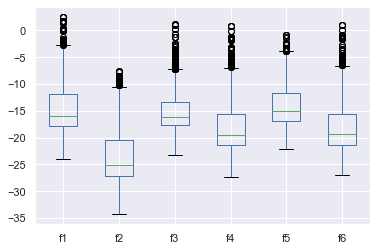

In [202]:
# Pol1 statistics 
boxplot = Pol1.boxplot(column=['f1', 'f2', 'f3','f4','f5','f6'])

## Heatmap

In [35]:
sns.set()

from scipy.stats import spearmanr

In [ ]:
# Heatmap from optical-radar data

In [220]:
Pol2 = df_crop[list(df_crop.loc[:,'f1':'f3']) +
               list(df_crop.loc[:,'f50':'f53']) +
               list(df_crop.loc[:,'f99':'f102']) +
               list(df_crop.loc[:,'f137':'f140'])]
Pol2

,f1,f2,f3,f50,f51,f52,f53,f99,f100,f101,f102,f137,f138,f139,f140
0,-13.55900,-21.4070,-11.40400,-12.5640,-23.436,-13.8580,-18.2090,0.009,0.057,0.048,0.165,6711,6143,4570,5064
1,-12.80200,-20.3350,-10.39900,-11.5590,-22.730,-12.8440,-17.3340,0.001,0.044,0.037,0.103,6274,5084,3297,3777
2,-12.43100,-19.9020,-10.07400,-11.0400,-22.566,-12.4580,-16.9030,0.001,0.046,0.046,0.107,6215,5035,3033,3837
3,-12.68900,-19.5290,-10.02800,-10.9100,-22.520,-12.1260,-16.8400,0.018,0.071,0.074,0.120,6836,5745,4212,4534
4,-12.68600,-19.2780,-9.81850,-10.5810,-22.387,-11.8580,-16.6230,0.023,0.066,0.068,0.131,6682,5883,4434,4627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325829,2.48230,-7.6870,1.07950,2.5997,-14.506,-2.7129,-1.8364,0.001,0.039,0.031,0.113,5960,5510,3023,4711
325830,2.52340,-7.6745,1.08680,2.9641,-14.247,-2.5502,-1.5095,0.046,0.088,0.069,0.117,7649,6544,4690,4823
325831,-1.92700,-11.4160,-2.43540,-0.6705,-18.389,-6.1030,-6.0812,0.001,0.026,0.005,0.096,6004,5343,3444,4255
325832,0.12483,-10.1440,-0.62193,1.6408,-16.098,-3.3703,-2.9287,0.001,0.041,0.024,0.107,6234,5469,3442,4472


In [221]:
numerical_columns = [n for n,col in Pol2.items() if pd.api.types.is_numeric_dtype(col)]
numerical_columns

['f1',
 'f2',
 'f3',
 'f50',
 'f51',
 'f52',
 'f53',
 'f99',
 'f100',
 'f101',
 'f102',
 'f137',
 'f138',
 'f139',
 'f140']

In [41]:
corr = spearmanr(Pol2[numerical_columns1].dropna()).correlation
corr

array([[ 1.        ,  0.9447894 ,  0.88609806,  0.79685398,  0.66567441,
         0.56128325,  0.69426774,  0.00144733,  0.3137093 ,  0.16706941,
         0.30188067,  0.12188821,  0.16098551, -0.02430178,  0.16203909],
       [ 0.9447894 ,  1.        ,  0.85454959,  0.80349914,  0.73250149,
         0.62259668,  0.7454167 ,  0.01096129,  0.30776492,  0.16808952,
         0.29604706,  0.10470492,  0.1406531 , -0.03848174,  0.14355231],
       [ 0.88609806,  0.85454959,  1.        ,  0.80591598,  0.72233319,
         0.71267535,  0.7605826 ,  0.09328064,  0.35547658,  0.25772954,
         0.28751395,  0.11460942,  0.10185625, -0.11709843,  0.10275672],
       [ 0.79685398,  0.80349914,  0.80591598,  1.        ,  0.88585014,
         0.84404853,  0.95261979,  0.20672148,  0.3849337 ,  0.26969253,
         0.30114647,  0.03113468,  0.0665211 , -0.22069262,  0.09705507],
       [ 0.66567441,  0.73250149,  0.72233319,  0.88585014,  1.        ,
         0.87731029,  0.90739705,  0.36395941, 

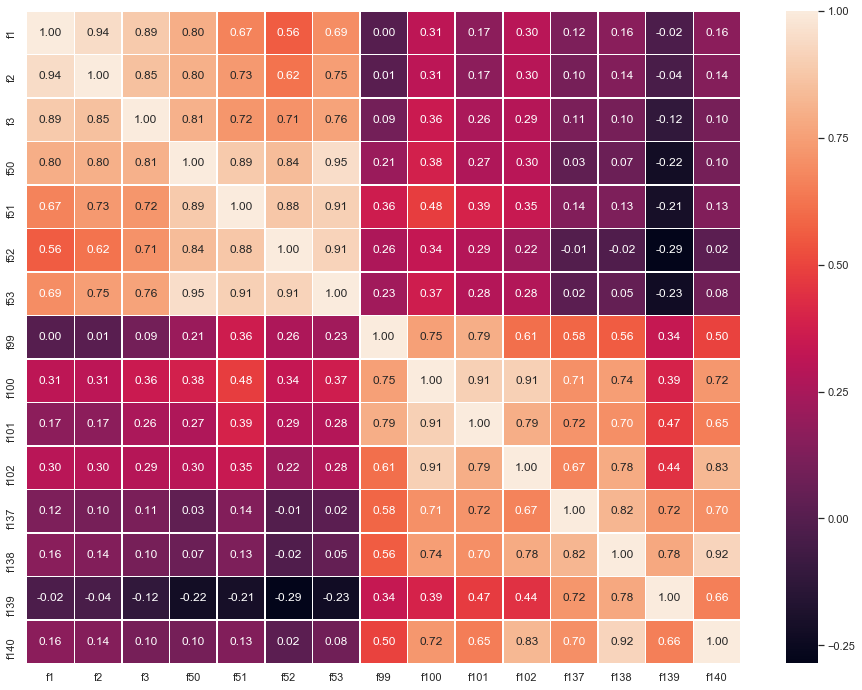

In [222]:
plt.figure(figsize=(16,12))

sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5,
           xticklabels=numerical_columns, yticklabels=numerical_columns) 


b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

In [ ]:
# as expected base on the Attribute Information 
# 4 regions for 2 features and 2 date

In [ ]:
# Heatmap from Water Quality Monitoring Data

In [ ]:
# the start of a new Kernel
# to save time

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import spearmanr
sns.set()

In [ ]:
# try to get more numerical attributes to make a heatmap on water data

In [6]:
df_water1 = pd.read_csv ('Water-Qual-Eau-Winnipeg-2000-present.csv')
df_w1 = df_water1.dropna(how='all', axis=1)
pd.set_option('chained',None)
df_w1['DATE_TIME_HEURE'] = pd.to_datetime(df_w1['DATE_TIME_HEURE'])
# change dtype 
date1 = df_w1['DATE_TIME_HEURE'].apply(lambda x:x.toordinal())
df_w1['time'] = date1
df_w1.dtypes

SITE_NO                    object
DATE_TIME_HEURE    datetime64[ns]
FLAG_MARQUEUR              object
VALUE_VALEUR              float64
VMV_CODE                    int64
UNIT_UNITE                 object
VARIABLE                   object
VARIABLE_FR                object
STATUS_STATUT              object
time                        int64
dtype: object

In [7]:
# 3 numerical columns, probable not goin to work
# the VALUE_VALEUR representing different variable 
# and VMV_CODE, the Valid Method Variable are included

In [8]:
numerical_columns1 = [n for n,col in df_w1.items() if pd.api.types.is_numeric_dtype(col)]

In [9]:
corr1 = spearmanr(df_w1[numerical_columns1].dropna()).correlation
corr1

array([[ 1.        , -0.06175338, -0.09529422],
       [-0.06175338,  1.        ,  0.34802663],
       [-0.09529422,  0.34802663,  1.        ]])

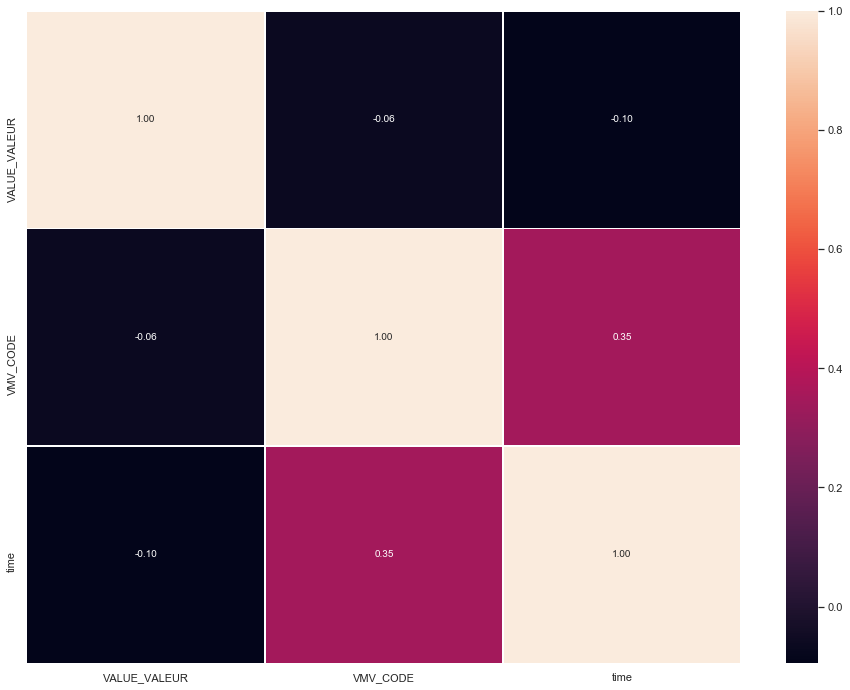

In [10]:
# well, there are correlations


plt.figure(figsize=(16,12))

sns.heatmap(corr1, annot=True, fmt='.2f', linewidths=.5,
           xticklabels=numerical_columns1, yticklabels=numerical_columns1) 


b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

In [ ]:
# the VMV_CODE is a six digit numeric code 
# representing a parameter and method of analysis used by Environment Canada
# so should not be correlated with time
# nonsense correlations
# and non of these corralations are significant 